In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set()
pd.options.mode.chained_assignment = None
tournament = pd.read_csv('/content/drive/MyDrive/MLProject/mldataset/HistoricalEsportData.csv', encoding='cp1252')
twitch = pd.read_csv('/content/drive/MyDrive/MLProject/mldataset/Twitch_game_data.csv', encoding='cp1252')

After imported twich and esport-earning data, I put it into dictionary in purpose to make it easier to access by having 'total' and 'total2016+'.

In [ ]:
tour = {}
for i in range(tournament.size//len(tournament.columns)):
    game = tournament.iloc[i]['Game']
    year = int(tournament.iloc[i]['Date'].split('/')[2])
    money = tournament.iloc[i]['Earnings']
    ntour = tournament.iloc[i]['Tournaments']
    
    if game not in tour:
        tour[game] = {'money':{'total':0,'total2016+':0},'ntour':{'total':0,'total2016+':0},'hw':{'total':0,'total2016+':0}}
    if year not in tour[game]['money']:
        tour[game]['money'][year] = money
        tour[game]['ntour'][year] = ntour
        tour[game]['money']['total'] += money
        tour[game]['ntour']['total'] += ntour
        if year >= 2016:
            tour[game]['money']['total2016+'] += money
            tour[game]['ntour']['total2016+'] += ntour
    else:
        tour[game]['money'][year] += money
        tour[game]['ntour'][year] += ntour
        tour[game]['money']['total'] += money
        tour[game]['ntour']['total'] += ntour
        if year >= 2016:
            tour[game]['money']['total2016+'] += money
            tour[game]['ntour']['total2016+'] += ntour
    

In [ ]:
for i in range(twitch.size//len(twitch.columns)):
    game = twitch.iloc[i]['Game']
    year = twitch.iloc[i]['Year']
    hw = twitch.iloc[i]['Hours_watched']
    if game not in tour:
        tour[game] = {'money':{'total':0,'total2016+':0},'ntour':{'total':0,'total2016+':0},'hw':{'total':0,'total2016+':0 }}
    if year not in tour[game]['hw']:
        tour[game]['hw'][year] = hw
        tour[game]['hw']['total'] += hw
        if year >= 2016:
            tour[game]['hw']['total2016+'] += hw
    else:
        tour[game]['hw'][year] += hw
        tour[game]['hw']['total'] += hw
        if year >= 2016:
            tour[game]['hw']['total2016+'] += hw

Because we want to focusing in Gaming in general so IRL content is excluded from our data.

In [ ]:
del tour['Just Chatting']
del tour['IRL']
del tour['Slots']
del tour['Music']
del tour['Sports']

Cleaning missing cells.

In [ ]:
tk = list(tour.keys())
for g in tk:
    if type(g) != type(""):
        del tour[g]

I put total money, total tournaments, total hours watched of every games into List and sorted to find Top 15 from each catagories.

In [ ]:

l = []
gamelist = set()
for game in tour.keys():
    if 'total2016+' in tour[game]['money'] and 'total2016+' in tour[game]['ntour'] and 'total2016+' in tour[game]['hw']:
        l.append({'game':game,'money':tour[game]['money']['total2016+'],'ntour':tour[game]['ntour']['total2016+'],'hw':tour[game]['hw']['total2016+']})
#list(d.keys()
l = sorted(l, key = lambda x:(x['money']))
l = l[::-1]


[Text(0, 0, 'League of Legends'),
 Text(0, 0, 'Fortnite'),
 Text(0, 0, 'Grand Theft Auto V'),
 Text(0, 0, 'Counter-Strike: Global Offensive'),
 Text(0, 0, 'Dota 2'),
 Text(0, 0, 'Hearthstone'),
 Text(0, 0, 'World of Warcraft'),
 Text(0, 0, 'Call of Duty: Warzone'),
 Text(0, 0, 'Minecraft'),
 Text(0, 0, 'VALORANT'),
 Text(0, 0, "PLAYERUNKNOWN'S BATTLEGROUNDS"),
 Text(0, 0, 'Overwatch'),
 Text(0, 0, 'Apex Legends'),
 Text(0, 0, 'Dead by Daylight'),
 Text(0, 0, 'Escape From Tarkov')]

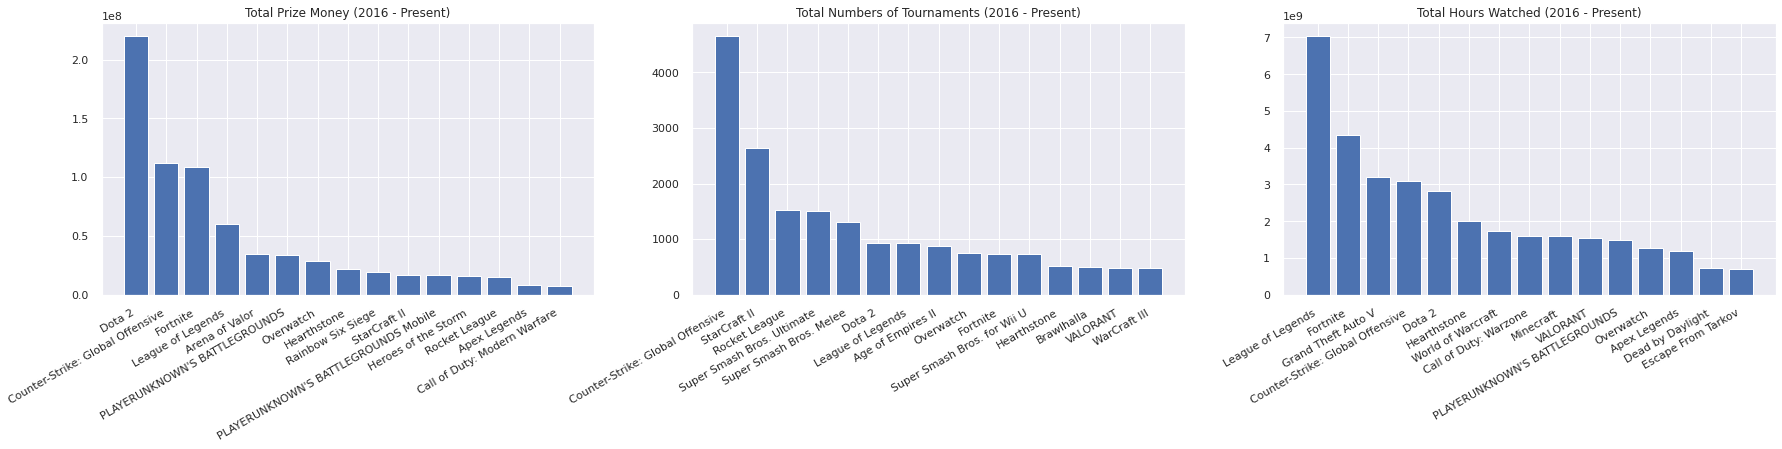

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set()
pd.options.mode.chained_assignment = None
fig, axs = plt.subplots(1,3)
fig.set_size_inches(30, 5)

l = sorted(l, key = lambda x:(x['money']))
l = l[::-1]
for i in range(15):
    gamelist.add(l[i]['game'])
axs[0].bar(list([L['game'] for L in l])[:15], list([L['money'] for L in l])[:15], align='center')
axs[0].title.set_text('Total Prize Money (2016 - Present)')
axs[0].set_xticklabels(list([L['game'] for L in l])[:15],rotation=30, ha='right')
l = sorted(l, key = lambda x:(x['ntour']))
l = l[::-1]
for i in range(15):
    gamelist.add(l[i]['game'])
axs[1].bar(list([L['game'] for L in l])[:15], list([L['ntour'] for L in l])[:15], align='center')
axs[1].title.set_text('Total Numbers of Tournaments (2016 - Present)')
axs[1].set_xticklabels(list([L['game'] for L in l])[:15],rotation=30, ha='right')
l = sorted(l, key = lambda x:(x['hw']))
l = l[::-1]
for i in range(15):
    gamelist.add(l[i]['game'])
axs[2].bar(list([L['game'] for L in l])[:15], list([L['hw'] for L in l])[:15], align='center')
axs[2].title.set_text('Total Hours Watched (2016 - Present)')
axs[2].set_xticklabels(list([L['game'] for L in l])[:15],rotation=30, ha='right')

This is the result, You might see that there are some games that appear in all three catagories while some other might only be seen in some of it.

In [ ]:
arr = {'Game Name':[],'Total Money':[],'Total Tournaments':[],'Hours Watched':[]}
for game in gamelist:
    arr['Game Name'].append(game)
    arr['Total Money'].append(tour[game]['money']['total2016+'])
    arr['Total Tournaments'].append(tour[game]['ntour']['total2016+'])
    arr['Hours Watched'].append(tour[game]['hw']['total2016+'])

I put it into this dictionary structure in order to convert it into dataframe, to make it easier when i want to plot and clustering by sklearn.

In [ ]:
clustering_datad = pd.DataFrame(arr).drop('Game Name', axis=1)
clustering_data = (clustering_datad-clustering_datad.mean())/clustering_datad.std() #normalization

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
A=np.arange(2,20)
scores = pd.DataFrame(columns=['Score'])

for x in A:
    #  Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=x, random_state=5342,reg_covar=1e-4).fit(clustering_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(clustering_data)
    # TODO: Find the cluster centers
    centers = clusterer.means_
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(clustering_data,preds)
    scores.loc[x] = [score]


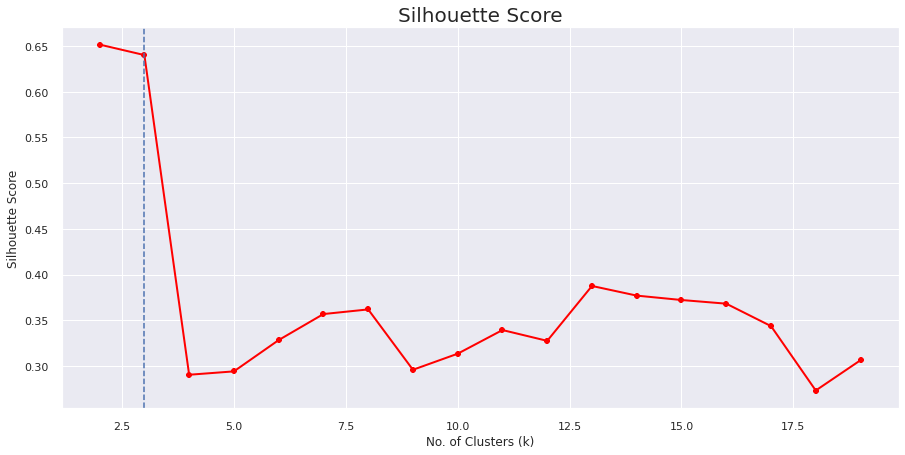

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(A,scores, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('Silhouette Score')
plt.xlabel('No. of Clusters (k)')
plt.title('Silhouette Score', fontsize = 20)
plt.show()

In [ ]:
n_clusters = 3
gmms = GaussianMixture(n_components=n_clusters, random_state=5342,reg_covar=1e-4)
gmms.fit(clustering_data)
d = clustering_data.copy()
d['Cluster_Prediction'] = gmms.fit_predict(clustering_data)
cmap = {0:'red',1:'blue',2:'green',3:'orange',4:'violet',5:'navajowhite',6:'pink'}
d['Color'] = [cmap[int(d.iloc[i]['Cluster_Prediction'])] for i in range(len(d))]
d['Game Name'] = [arr['Game Name'][i] for i in range(len(d))]
import plotly.express as px

fig = px.scatter_3d(d, x='Total Money', y='Total Tournaments', z='Hours Watched',text='Game Name',
              color='Color')
fig.show(renderer="colab")
for i in range(n_clusters):
  print("Cluster : ",i)
  for j in range(len(d)):
    if d.iloc[j]['Cluster_Prediction'] == i:
      print(d.iloc[j]['Game Name'])
  print()

Cluster :  0
Dota 2
Fortnite
League of Legends

Cluster :  1
Grand Theft Auto V
Rainbow Six Siege
Dead by Daylight
Super Smash Bros. Melee
Escape From Tarkov
Rocket League
Overwatch
PLAYERUNKNOWN'S BATTLEGROUNDS
StarCraft II
Heroes of the Storm
VALORANT
Call of Duty: Modern Warfare
Hearthstone
PLAYERUNKNOWN'S BATTLEGROUNDS Mobile
Brawlhalla
Apex Legends
Super Smash Bros. Ultimate
World of Warcraft
WarCraft III
Arena of Valor
Call of Duty: Warzone
Minecraft
Super Smash Bros. for Wii U
Age of Empires II

Cluster :  2
Counter-Strike: Global Offensive



From the result, One thing that make this unusable is because , as you can see, There are a lot of games especially Call of Duty Series that was put in the position that not where it should be.
Because the games was released new series ever year so it make the model count each Call of Duty as an individual.

With that being said, I came up with an idea that we can actually clustering the game that having similar name to be the same series, in order to make it right in term of gaming market. And the solution is using "FUZZYWUZZY".

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

def difscore(string1,string2):
    temp1 = ""
    for s in string1.lower():
        if ord('a')<=ord(s)<=ord('z'):
            temp1 += s
    temp2 = ""
    for s in string2.lower():
        if ord('a')<=ord(s)<=ord('z'):
            temp2 += s
    #print([temp1,temp2])
    return max(fuzz.token_set_ratio(temp1,temp2),fuzz.partial_ratio(string1,string2))

print(difscore('Ultra Street Fighter IV','Street Fighter V'))
print(difscore('Animal Crossing: New Horizons','Animal Crossing: New Leaf'))
print(difscore('FIFA 07','FIFA 21'))
print(difscore('Counter-Strike: Global Offensive','Counter-Strike: Condition Zero'))


94
84
100
63


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



FuzzyWuzzy algorithm is well-known for being able to know how similar of two words is. It have many critiria to use depend on the data which i decide to use "token_set_ratio" and 'partial_ratio'.

'partial_ratio' is the method that calculate how similar of 2 string by mainly consider if one of substring in s1 is similar to substring in s2, it will give the score higher than other method which is very useful in this regard because when developer decide to release a new series, they usually using the same old name and add extra name or a number after which make 'partial_ratio' viable option.

But it isn't enough because some of the series (for example F1 2018 , NFL 2019, FIFA 2016 ) They having a number even longer than the name itself, which if I reduce thereshould low enough to be able to use only 'partial_ratio' it will over-clusterd all the game in to one cluster.

That's why I use another way which is 'token_set_ratio' with a special string that convert only alphabet from string (exclude all number and special character) which make the result much more better and having almost no over-clustered.

This algorithm using O(n^2) in order to having every words calculate score with every words which It can be optimized to even around O(n) but i decided to go with O(n^2) because I only have around 2k records and it make the result more accurate.<br><br>

In [ ]:

game_cluster = []
thereshould = 88
cc = 0
for g in sorted(tour.keys()):
    cc += 1
    if cc%500 == 0:
        print('i = ',cc)
    clusterno = 0
    if not game_cluster:
        game_cluster.append([g])
    else:
        is_clustered = False
        for i in range(len(game_cluster)):
            gc = game_cluster[i]
            
            score = 0
            for each in gc:
                score = max(difscore(g,each),score)
            if score>=thereshould:
                is_clustered = True
                gc.append(g)
                clusterno = i
                break
        if not is_clustered:
            game_cluster.append([g])
            clusterno = len(game_cluster)-1
    tour[g]['cluster no.'] = clusterno
            
            


i =  500
i =  1000
i =  1500
i =  2000



After trial and errors, I found out that 88 is the best thereshould of this problem and it took around 6 minutes to finish each run.

Next, I need to create a name that represent the cluster.

In [ ]:
game_cluster_name = []
cc = 0
import re
for cluster in (game_cluster):
    #print(cluster)
    if len(cluster) == 1:
        game_cluster_name.append(cluster[0])
    else:    
        arr_of_dict = []
        
        for g in cluster:
            gsplit = re.split(" |'|,|:", g)
            
            #print(gsplit)
            for i in range(len(gsplit)):
                gsplit[i] = gsplit[i].upper()
                if len(arr_of_dict)<=i:
                    arr_of_dict.append({'sumword':0})
                if gsplit[i] not in arr_of_dict[i]:
                    arr_of_dict[i][gsplit[i]] = 1
                    arr_of_dict[i]['sumword'] += 1
                else:
                    arr_of_dict[i][gsplit[i]] += 1
                    arr_of_dict[i]['sumword'] += 1
        seriesname = ""
        for i in range(len(arr_of_dict)):
            d = arr_of_dict[i]
            templ = sorted([[dk,d[dk]]for dk in d.keys() if dk!='sumword'],key = lambda x:(x[1]))[::-1]
            # if templ[0][1] == 1:
            #     if i == 0:
            #         seriesname = cluster[0] + ' '
            #         break
            if templ[0][1]/d['sumword']>0.5 and d['sumword'] != 1:
                
                seriesname += templ[0][0]+' '
            else:
                if seriesname == '':
                    
                    seriesname = min(cluster, key=len) + ' '
                break
        game_cluster_name.append(seriesname+"Series")
        if seriesname == '':
            print(arr_of_dict)
        #print(seriesname+"Series")
                    
                
    cc += 1

In [ ]:
game_cluster_name[:15:]

['.hack//G.U. Last Recode',
 '60 Parsecs!',
 '60 Seconds!',
 '7 Days to Die',
 '<U+014C>kami',
 'A Dance of Fire and Ice',
 'A Hat in Time',
 'A Plague Tale: Innocence',
 'A Total War Saga: Troy',
 'A Way Out',
 'ABZ<U+00DB>',
 'AI: The Somnium Files',
 'ALTF4',
 'ANIME STANDING',
 'APB Reloaded']

In [ ]:
for g in tour.keys():
    tour[g]['cluster_name'] = game_cluster_name[tour[g]['cluster no.']]

In [ ]:
tour['Auto Chess']

{'cluster no.': 73,
 'cluster_name': 'Chess Series',
 'hw': {2019: 36658043,
  2020: 430368,
  'total': 37088411,
  'total2016+': 37088411},
 'money': {2019: 1076322.28,
  2020: 60098.0,
  2021: 1800.0,
  'total': 1138220.28,
  'total2016+': 1138220.28},
 'ntour': {2019: 6, 2020: 2, 2021: 9, 'total': 17, 'total2016+': 17}}

Because it took really long process to create a cluster of game series, so I decided to create a new csv file that save all the process before.

In [ ]:
import pandas as pd 
import numpy as np 
pd.options.mode.chained_assignment = None
postprocessing_tour = pd.DataFrame(tour).transpose()
postprocessing_tour.to_csv('postprocessing_tour.csv')
!cp postprocessing_tour.csv "/content/drive/MyDrive/MLProject/mldataset"

In [3]:
import pandas as pd 
import numpy as np 
import yaml
postpro = pd.read_csv('/content/drive/MyDrive/MLProject/mldataset/postprocessing_tour.csv')
postpro = postpro.rename(columns={"Unnamed: 0": "Game Name"})
tour = {}
for i in range(len(postpro)):
    tour[postpro.iloc[i]['Game Name']] = {'money':yaml.load(postpro.iloc[i]['money']),'ntour':yaml.load(postpro.iloc[i]['ntour']),'hw':yaml.load(postpro.iloc[i]['hw']),'cluster no.':postpro.iloc[i]['cluster no.'],'cluster_name':postpro.iloc[i]['cluster_name']}

In [ ]:
tour['VALORANT']

{'cluster no.': 1306,
 'cluster_name': 'VALORANT',
 'hw': {2020: 814503048,
  2021: 729665220,
  'total': 1544168268,
  'total2016+': 1544168268},
 'money': {2020: 2380536.3099999996,
  2021: 4659566.53,
  'total': 7040102.839999999,
  'total2016+': 7040102.839999999},
 'ntour': {2020: 311, 2021: 169, 'total': 480, 'total2016+': 480}}

In [4]:
gameclustered = {}
for g in tour:
  if tour[g]['cluster_name'] not in gameclustered:
    gameclustered[tour[g]['cluster_name']] = {'money':{'totalmoney2016+':tour[g]['money']['total2016+'],'total':tour[g]['money']['total']},'ntour':{'totalntour2016+':tour[g]['ntour']['total2016+'],'total':tour[g]['ntour']['total']},'hw':{'totalhw2016+':tour[g]['hw']['total2016+'],'total':tour[g]['hw']['total']}}
  else:
    gameclustered[tour[g]['cluster_name']]['money']['totalmoney2016+']+=tour[g]['money']['total2016+']
    gameclustered[tour[g]['cluster_name']]['ntour']['totalntour2016+']+=tour[g]['ntour']['total2016+']
    gameclustered[tour[g]['cluster_name']]['hw']['totalhw2016+']+=tour[g]['hw']['total2016+']
    gameclustered[tour[g]['cluster_name']]['money']['total']+=tour[g]['money']['total']
    gameclustered[tour[g]['cluster_name']]['ntour']['total']+=tour[g]['ntour']['total']
    gameclustered[tour[g]['cluster_name']]['hw']['total']+=tour[g]['hw']['total']
  for year in tour[g]['money'].keys():
      
      money = tour[g]['money'][year]
      if type(year) == type(2016):
          if year not in gameclustered[tour[g]['cluster_name']]['money']:
            gameclustered[tour[g]['cluster_name']]['money'][year] = money
          else:
            gameclustered[tour[g]['cluster_name']]['money'][year] += money
  for year in tour[g]['ntour'].keys():
      ntour = tour[g]['ntour'][year]
      
      if type(year) == type(2016):
          if year not in gameclustered[tour[g]['cluster_name']]['ntour']:
            gameclustered[tour[g]['cluster_name']]['ntour'][year] = ntour
          else:
            gameclustered[tour[g]['cluster_name']]['ntour'][year] += ntour
  for year in tour[g]['hw'].keys():
      hw = tour[g]['hw'][year]
      if type(year) == type(2016) or type(year) == np.int64:
          #print("HEy")
          if year not in gameclustered[tour[g]['cluster_name']]['hw']:
            gameclustered[tour[g]['cluster_name']]['hw'][year] = hw
          else:
            gameclustered[tour[g]['cluster_name']]['hw'][year] += hw

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def seriesplot_year(series,ys,ye):
    print("hello")
def seriesplot(series):
    #df = pd.DataFrame({'yearmoney':[y for y in gameclustered[series]['money'].keys() if (type(y) == int or type(y) == np.int64) and int(y)>=2016 ],'yearntour':[y for y in gameclustered[series]['ntour'].keys() if (type(y) == int or type(y) == np.int64) and int(y)>=2016 ],'yearhw':[y for y in gameclustered[series]['hw'].keys() if (type(y) == int or type(y) == np.int64) and int(y)>=2016 ],'money':[gameclustered[series]['money'][y] for y in gameclustered[series]['money'].keys() if (type(y) == int or type(y) == np.int64) and int(y)>=2016],'ntour':[gameclustered[series]['ntour'][y] for y in gameclustered[series]['ntour'].keys() if (type(y) == int or type(y) == np.int64) and int(y)>=2016],'hw':[gameclustered[series]['hw'][y] for y in gameclustered[series]['hw'].keys() if (type(y) == int or type(y) == np.int64) and int(y)>=2016]})
    fig = make_subplots(
    rows=1, cols=3,
    specs=[[{"type": "bar"},{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Prize Money (2016 - Present)", "Numbers of Tournaments (2016 - Present)", "Hours Watched (2016 - Present)"),
    
    )
    fig.add_trace(
    go.Bar(x=[y for y in gameclustered[series]['money'].keys() if (type(y) == int or type(y) == np.int64) and int(y)>=2016 ],y=[gameclustered[series]['money'][y] for y in gameclustered[series]['money'].keys() if (type(y) == int or type(y) == np.int64) and int(y)>=2016], marker=dict(color="crimson"), showlegend=False),
    row=1, col=1
    )
    fig.add_trace(
    go.Bar(x=[y for y in gameclustered[series]['ntour'].keys() if (type(y) == int or type(y) == np.int64) and int(y)>=2016 ],y=[gameclustered[series]['ntour'][y] for y in gameclustered[series]['ntour'].keys() if (type(y) == int or type(y) == np.int64) and int(y)>=2016], marker=dict(color="crimson"), showlegend=False),
    row=1, col=2
    )
    fig.add_trace(
    go.Bar(x=[y for y in gameclustered[series]['hw'].keys() if (type(y) == int or type(y) == np.int64) and int(y)>=2016 ],y=[gameclustered[series]['hw'][y] for y in gameclustered[series]['hw'].keys() if (type(y) == int or type(y) == np.int64 or type(y) == np.int) and int(y)>=2016], marker=dict(color="crimson"), showlegend=False),
    row=1, col=3
    )
    fig.update_layout(
    title={
        'text': series,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
    fig.update_yaxes(title_text="Prize ( US Dollar )", row=1, col=1)
    fig.update_xaxes(title_text="Year", row=1, col=1)
    fig.update_yaxes(title_text="Tournaments", row=1, col=2)
    fig.update_xaxes(title_text="Year", row=1, col=2)
    fig.update_yaxes(title_text="Time Watched ( Hours )", row=1, col=3)
    fig.update_xaxes(title_text="Year", row=1, col=3)
    fig.show(render='colab')
    
# plt.bar(list(tour['Dota 2']['money'].keys()), list(tour['Dota 2']['money'].values()), align='center')
# plt.title("Numbers of Tournaments (Dota 2)")
#plt.xticks(range(len(dictz)), list(dictz.keys()))

In [ ]:
seriesplot('TRACKMANIA Series')

In [ ]:
seriesplot('Chess Series')

I put total money, total tournaments, total hours watched of every series into List and sorted to find Top 15 from each catagories.

[Text(0, 0, 'LEAGUE OF LEGENDS Series'),
 Text(0, 0, 'Fortnite'),
 Text(0, 0, 'GRAND THEFT AUTO Series'),
 Text(0, 0, 'COUNTER-STRIKE  Series'),
 Text(0, 0, 'Dota 2'),
 Text(0, 0, 'CALL OF DUTY  Series'),
 Text(0, 0, 'HEARTHSTONE Series'),
 Text(0, 0, 'WORLD OF WARCRAFT Series'),
 Text(0, 0, 'MINECRAFT Series'),
 Text(0, 0, 'VALORANT')]

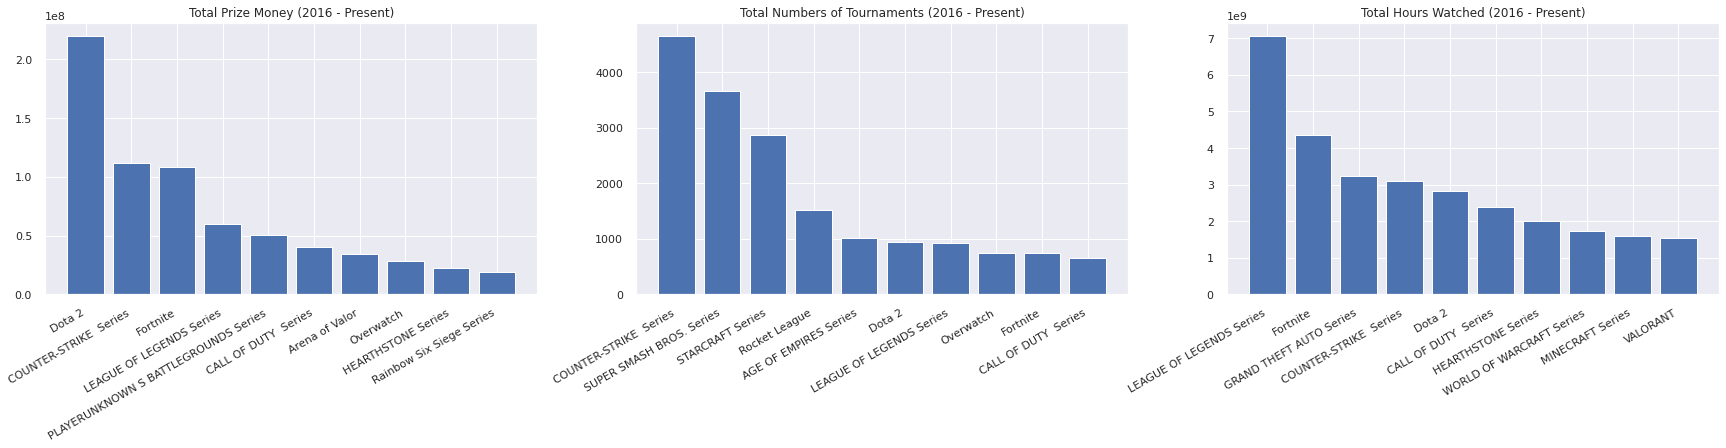

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set()
l = []
serieslist = set()
for series in gameclustered.keys():
    l.append({'series':series,'money':gameclustered[series]['money']['totalmoney2016+'],'ntour':gameclustered[series]['ntour']['totalntour2016+'],'hw':gameclustered[series]['hw']['totalhw2016+']})
#list(d.keys()
l = sorted(l, key = lambda x:(x['money']))
l = l[::-1]

pd.options.mode.chained_assignment = None
fig, axs = plt.subplots(1,3)
fig.set_size_inches(30, 5)
number_of_series = 10
l = sorted(l, key = lambda x:(x['money']))
l = l[::-1]
for i in range(number_of_series):
    serieslist.add(l[i]['series'])
axs[0].bar(list([L['series'] for L in l])[:number_of_series], list([L['money'] for L in l])[:number_of_series], align='center')
axs[0].title.set_text('Total Prize Money (2016 - Present)')
axs[0].set_xticklabels(list([L['series'] for L in l])[:number_of_series],rotation=30, ha='right')
l = sorted(l, key = lambda x:(x['ntour']))
l = l[::-1]
for i in range(number_of_series):
    serieslist.add(l[i]['series'])
axs[1].bar(list([L['series'] for L in l])[:number_of_series], list([L['ntour'] for L in l])[:number_of_series], align='center')
axs[1].title.set_text('Total Numbers of Tournaments (2016 - Present)')
axs[1].set_xticklabels(list([L['series'] for L in l])[:number_of_series],rotation=30, ha='right')
l = sorted(l, key = lambda x:(x['hw']))
l = l[::-1]
for i in range(number_of_series):
    serieslist.add(l[i]['series'])
axs[2].bar(list([L['series'] for L in l])[:number_of_series], list([L['hw'] for L in l])[:number_of_series], align='center')
axs[2].title.set_text('Total Hours Watched (2016 - Present)')
axs[2].set_xticklabels(list([L['series'] for L in l])[:number_of_series],rotation=30, ha='right')

Compare to the previos result, Call of Duty is back to where they deserved which is Top3 in every catagories which make it much more viable for the real world context.

In [ ]:
sorted(serieslist)

['AGE OF EMPIRES Series',
 'Arena of Valor',
 'CALL OF DUTY  Series',
 'COUNTER-STRIKE  Series',
 'Dota 2',
 'Fortnite',
 'GRAND THEFT AUTO Series',
 'HEARTHSTONE Series',
 'LEAGUE OF LEGENDS Series',
 'MINECRAFT Series',
 'Overwatch',
 'PLAYERUNKNOWN S BATTLEGROUNDS Series',
 'Rainbow Six Siege Series',
 'Rocket League',
 'STARCRAFT Series',
 'SUPER SMASH BROS. Series',
 'VALORANT',
 'WORLD OF WARCRAFT Series']

After this, I repeated all the processes the same as when i clustered the game.

In [12]:
arr2 = {'Series Name':[],'Total Money':[],'Total Tournaments':[],'Hours Watched':[]}
for series in serieslist:
    arr2['Series Name'].append(series)
    arr2['Total Money'].append(gameclustered[series]['money']['totalmoney2016+'])
    arr2['Total Tournaments'].append(gameclustered[series]['ntour']['totalntour2016+'])
    arr2['Hours Watched'].append(gameclustered[series]['hw']['totalhw2016+'])

In [13]:
pd.DataFrame(arr2)

,Series Name,Total Money,Total Tournaments,Hours Watched
0,AGE OF EMPIRES Series,1.445589e+06,1015,93078548
1,COUNTER-STRIKE Series,1.122050e+08,4663,3091538246
2,SUPER SMASH BROS. Series,5.282566e+06,3667,255910344
3,MINECRAFT Series,4.295392e+05,20,1592603349
4,Fortnite,1.082814e+08,740,4351131336
5,PLAYERUNKNOWN S BATTLEGROUNDS Series,5.016379e+07,396,1475296705
6,Rainbow Six Siege Series,1.915797e+07,325,648561227
7,Arena of Valor,3.478949e+07,65,6336569
8,GRAND THEFT AUTO Series,0.000000e+00,0,3221285327
9,WORLD OF WARCRAFT Series,2.369000e+06,52,1728886628


In [36]:
import plotly.express as px

!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
import plotly.io as pio
pio.renderers.default = "colab"
fig = px.scatter_3d(pd.DataFrame(arr2), x='Total Money', y='Total Tournaments', z='Hours Watched',text='Series Name')
fig.show()

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [37]:
clustering_seriesd = pd.DataFrame(arr2).drop('Series Name', axis=1)
clustering_series = (clustering_seriesd-clustering_seriesd.mean())/clustering_seriesd.std()
clustering_series

,Total Money,Total Tournaments,Hours Watched
0,-0.715026,-0.056339,-1.026484
1,1.264884,2.712717,0.666085
2,-0.646437,1.956692,-0.934569
3,-0.733189,-0.811605,-0.180033
4,1.194746,-0.265081,1.377099
5,0.155850,-0.526198,-0.246250
6,-0.398404,-0.580092,-0.712925
7,-0.118978,-0.777448,-1.075448
8,-0.740867,-0.826787,0.739324
9,-0.698519,-0.787315,-0.103104


In [38]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
A=np.arange(2,number_of_series)
scores = pd.DataFrame(columns=['Score'])
seed = 134
for x in A:
    

    #  Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=x, random_state=seed,reg_covar=1e-4).fit(clustering_series)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(clustering_series)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(clustering_series,preds)
    scores.loc[x] = [score]


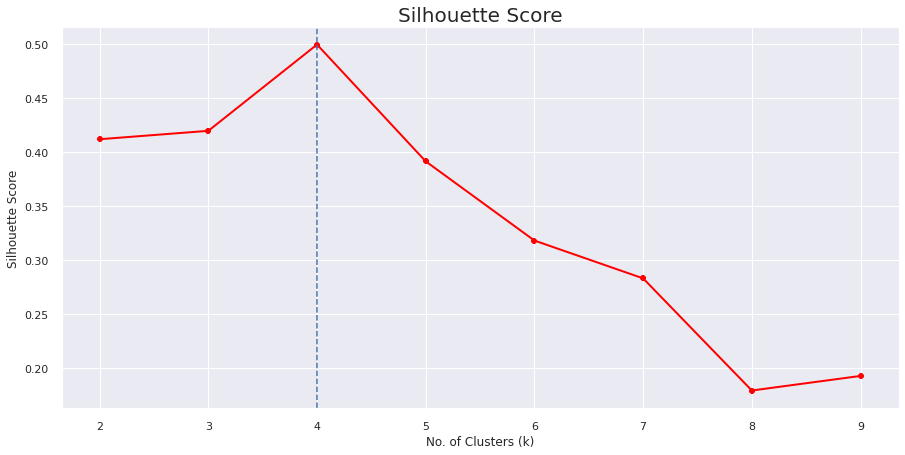

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(A,scores, linewidth=2, color="red", marker ="8")
plt.axvline(x=4, ls='--')
plt.ylabel('Silhouette Score')
plt.xlabel('No. of Clusters (k)')
plt.title('Silhouette Score', fontsize = 20)
plt.show()

In [40]:
n_clusters =  4
gmms = GaussianMixture(n_components=n_clusters, random_state=seed,reg_covar=1e-4)
gmms.fit(clustering_series)
d = pd.DataFrame(arr2).drop('Series Name', axis=1)
d['Cluster_Prediction'] = gmms.fit_predict(clustering_series)
cmap = {0:'red',1:'blue',2:'green',3:'orange',4:'violet',5:'navajowhite',6:'pink',7:'#1f77b4',  # muted blue
    8:'#ff7f0e',  # safety orange
    9:'#2ca02c',  # cooked asparagus green
    10:'#d62728',  # brick red
    11:'#9467bd',  # muted purple
    12:'#8c564b',  # chestnut brown
    13:'#e377c2',  # raspberry yogurt pink
    14:'#7f7f7f',  # middle gray
    15:'#bcbd22',  # curry yellow-green
    16:'#17becf'   # blue-teal}
}
d['Color'] = [cmap[int(d.iloc[i]['Cluster_Prediction'])] for i in range(len(d))]
d['Series Name'] = [arr2['Series Name'][i] for i in range(len(d))]
import plotly.express as px

fig = px.scatter_3d(d, x='Total Money', y='Total Tournaments', z='Hours Watched',text='Series Name',
              color='Color')
fig.show()
for i in range(n_clusters):
  print("Cluster : ",i)
  for j in range(len(d)):
    if d.iloc[j]['Cluster_Prediction'] == i:
      print(d.iloc[j]['Series Name'])
  print()

Cluster :  0
AGE OF EMPIRES Series
MINECRAFT Series
PLAYERUNKNOWN S BATTLEGROUNDS Series
Rainbow Six Siege Series
Arena of Valor
GRAND THEFT AUTO Series
WORLD OF WARCRAFT Series
Overwatch
HEARTHSTONE Series
Rocket League
CALL OF DUTY  Series
VALORANT

Cluster :  1
COUNTER-STRIKE  Series
SUPER SMASH BROS. Series
STARCRAFT Series

Cluster :  2
Dota 2

Cluster :  3
Fortnite
LEAGUE OF LEGENDS Series



As you can see, The result is much more reasonable and really making sense with the real world. But is it enough?<br><br>
If you consider gaming industry recently, VALORANT is the new comer that really make a jump to become one of the top game in term of esport and viewership but it only stay around the same tier as other less-popularity game such as Overwatch is has beed massively lossing popularity since 2019.
<br><br>
From my processes, I calculated every paremeter equally across 2016 to present which in fact, some of them lost the popularity in recents year and make that series less appealing than the others.
Because of that, I came up with the idea that each year should have different weight depend on how recent it is and with how we going to decide its weight.

In [41]:
def filterfunction(type,m,k,base,plot):
    import numpy as np
    import math
    import pandas as pd
    import plotly.express as px
    
    
    if type == 'expo':
      xd = [i for i in range(1,7)]
      yx = [math.exp(m*(i-k)) for i in xd]
      sumy = sum(yx)
      y = [i/sumy for i in yx]
    elif type == 'log':
      xd = [i-k for i in range(1,7)]
      yx = []
      for i in xd:
        if m*i<1:
          yx.append(math.log(1,base))
        else:
          yx.append(math.log(m*i,base))
      sumy = sum(yx)
      y = [i/sumy for i in yx]
    z = [i+2015 for i in range(1,7)]
    df = pd.DataFrame(dict(
        x = xd,
        y = y,
        z = z
    ))
    if plot.lower() == 'plot':
      fig = px.line(df, x="x", y="y", title=type+" : "+str(m)+"(year-"+str(k)+")") 

      #fig.update_yaxes(range = [0,5])
      fig.update_layout(
      xaxis = dict(
          tickmode = 'array',
          tickvals = df['x'],
          ticktext = df['z']
      )
      )
      fig.update_yaxes(range=list([0,1]))
      fig.show(render = 'colab')

    return {z[i]:y[i] for i in range(len(y))}

In [42]:
filterfunction('expo',2,0,1,'plot')

{2016: 3.925595860610245e-05,
 2017: 0.00029006448035779047,
 2018: 0.0021433027176708816,
 2019: 0.015836984017860666,
 2020: 0.1170203633458406,
 2021: 0.864670029479664}

In [43]:
filterfunction('log',0.2,-1,100,'plot')

{2016: 0.0,
 2017: 0.0,
 2018: 0.0,
 2019: 0.0,
 2020: 0.3514335736242143,
 2021: 0.6485664263757858}

In [44]:
filter = filterfunction('expo',0.5,0,1,'no plot')


In [45]:
def filter_gc (type,m,k,base,plot):
  filter = filterfunction(type,m,k,base,plot)
  print("FILTER = ",filter)
  newgameclustered = gameclustered.copy()
  gck = newgameclustered.keys()
  for gc in gck:
    newgameclustered[gc]['money']['filter2016+'] = 0
    newgameclustered[gc]['ntour']['filter2016+'] = 0
    newgameclustered[gc]['hw']['filter2016+'] = 0
    for year in filter.keys():
      for hey in ['money','ntour','hw']:
        if year in newgameclustered[gc][hey]:
          newgameclustered[gc][hey]['filter2016+'] += newgameclustered[gc][hey][year]*filter[year]
  print(newgameclustered['VALORANT'])
  return newgameclustered
      


In [46]:
def serieslisttop (type,m,k,base,top,plot):
  import pandas as pd 
  import numpy as np 
  import matplotlib.pyplot as plt
  import seaborn as sns
  plt.style.use('seaborn')
  sns.set()
  l = []
  serieslist = set()
  if type != None:
    text = "Filter "+type+" : "+str(m)+"(year-"+str(k)+")"
    gck = filter_gc(type,m,k,base,plot)
  else:
    text = "No Filter"
    gck = gameclustered.copy()
  for series in gck.keys():
      if type == None:
        l.append({'series':series,'money':gameclustered[series]['money']['totalmoney2016+'],'ntour':gameclustered[series]['ntour']['totalntour2016+'],'hw':gameclustered[series]['hw']['totalhw2016+']})
      else:
        l.append({'series':series,'money':gameclustered[series]['money']['filter2016+'],'ntour':gameclustered[series]['ntour']['filter2016+'],'hw':gameclustered[series]['hw']['filter2016+']})
  #list(d.keys()
  l = sorted(l, key = lambda x:(x['money']))
  l = l[::-1]

  pd.options.mode.chained_assignment = None
  fig, axs = plt.subplots(1,3)
  fig.set_size_inches(30, 5)
  plt.title(str(type))
  number_of_series = top
  l = sorted(l, key = lambda x:(x['money']))
  l = l[::-1]
  for i in range(number_of_series):
      serieslist.add(l[i]['series'])
  axs[0].bar(list([L['series'] for L in l])[:number_of_series], list([L['money'] for L in l])[:number_of_series], align='center')
  
  axs[0].title.set_text('Total Prize Money '+text)
  axs[0].set_xticklabels(list([L['series'] for L in l])[:number_of_series],rotation=30, ha='right')
  l = sorted(l, key = lambda x:(x['ntour']))
  l = l[::-1]
  for i in range(number_of_series):
      serieslist.add(l[i]['series'])
  axs[1].bar(list([L['series'] for L in l])[:number_of_series], list([L['ntour'] for L in l])[:number_of_series], align='center')
  axs[1].title.set_text('Total Numbers of Tournaments '+text)
  axs[1].set_xticklabels(list([L['series'] for L in l])[:number_of_series],rotation=30, ha='right')
  l = sorted(l, key = lambda x:(x['hw']))
  l = l[::-1]
  for i in range(number_of_series):
      serieslist.add(l[i]['series'])
  axs[2].bar(list([L['series'] for L in l])[:number_of_series], list([L['hw'] for L in l])[:number_of_series], align='center')
  axs[2].title.set_text('Total Hours Watched '+text)
  axs[2].set_xticklabels(list([L['series'] for L in l])[:number_of_series],rotation=30, ha='right')
  return serieslist

FILTER =  {2016: 3.925595860610245e-05, 2017: 0.00029006448035779047, 2018: 0.0021433027176708816, 2019: 0.015836984017860666, 2020: 0.1170203633458406, 2021: 0.864670029479664}
{'money': {'totalmoney2016+': 7040102.839999999, 'total': 7040102.839999999, 2020: 2380536.3099999996, 2021: 4659566.53, 'filter2016+': 4307558.752811722}, 'ntour': {'totalntour2016+': 480, 'total': 480, 2020: 311, 2021: 169, 'filter2016+': 182.52256798261965}, 'hw': {'totalhw2016+': 1544168268, 'total': 1544168268, 2020: 814503048, 2021: 729665220, 'filter2016+': 726233089.9109402}}


{'AGE OF EMPIRES Series',
 'Apex Legends',
 'Arena of Valor',
 'CALL OF DUTY  Series',
 'COUNTER-STRIKE  Series',
 'Chess Series',
 'DEAD BY DAYLIGHT Series',
 'Diabotical',
 'Dota 2',
 'ESCAPE FROM TARKOV Series',
 'FIFA Series',
 'Fortnite',
 'Free Fire Series',
 'GRAND THEFT AUTO Series',
 'HEARTHSTONE Series',
 'LEAGUE OF LEGENDS Series',
 'MINECRAFT Series',
 'Overwatch',
 'PLAYERUNKNOWN S BATTLEGROUNDS Series',
 'Rainbow Six Siege Series',
 'Rocket League',
 'Rust Series',
 'STARCRAFT Series',
 'SUPER SMASH BROS. Series',
 'Street Fighter V Series',
 'TRACKMANIA Series',
 'VALORANT',
 'WORLD OF WARCRAFT Series'}

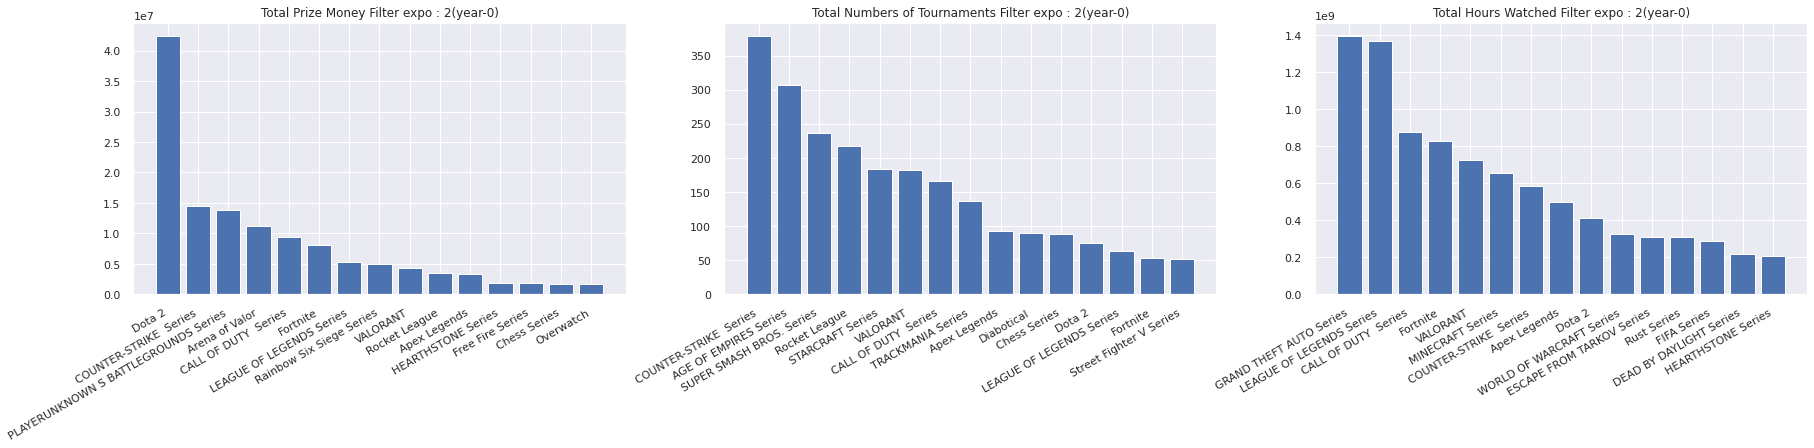

In [47]:
serieslisttop('expo',2,0,1,15,'plot')

{'AGE OF EMPIRES Series',
 'Apex Legends',
 'Arena of Valor',
 'Brawlhalla',
 'CALL OF DUTY  Series',
 'COUNTER-STRIKE  Series',
 'Dota 2',
 'ESCAPE FROM TARKOV Series',
 'FIFA Series',
 'Fortnite',
 'GRAND THEFT AUTO Series',
 'HEARTHSTONE Series',
 'Heroes of the Storm',
 'LEAGUE OF LEGENDS Series',
 'MINECRAFT Series',
 'Overwatch',
 'PLAYERUNKNOWN S BATTLEGROUNDS Series',
 'Rainbow Six Siege Series',
 'Rocket League',
 'STARCRAFT Series',
 'SUPER SMASH BROS. Series',
 'TRACKMANIA Series',
 'VALORANT',
 'WARCRAFT III Series',
 'WORLD OF WARCRAFT Series'}

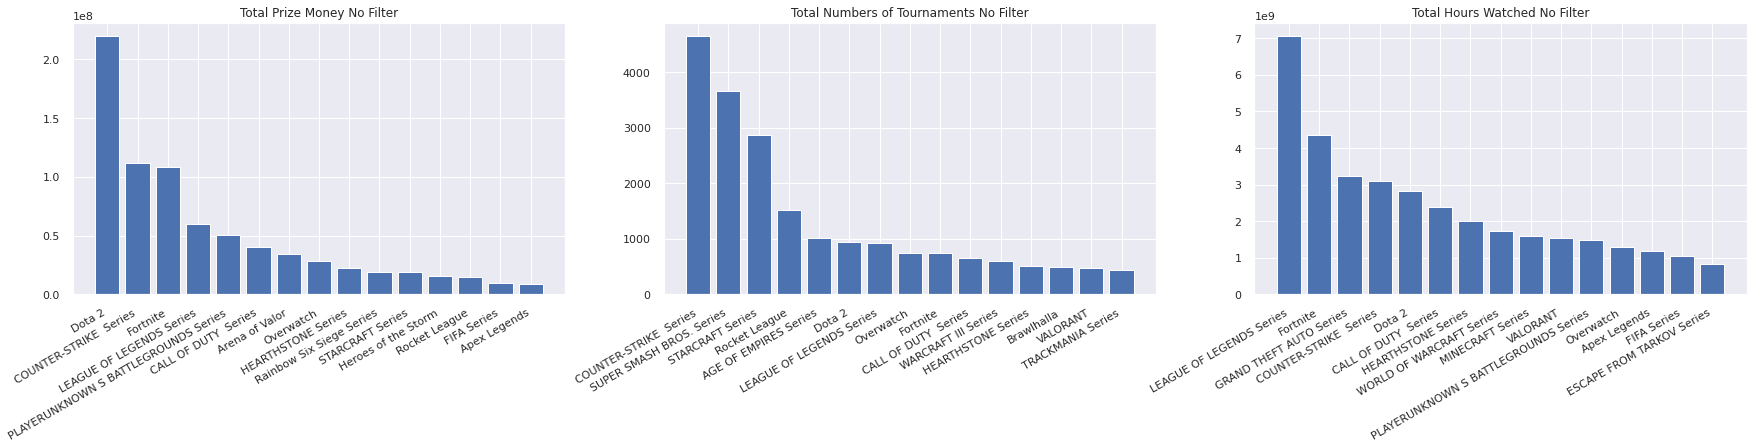

In [48]:
serieslisttop(None,0,0,0,15,'plot')

FILTER =  {2016: 0.0, 2017: 0.0, 2018: 0.0, 2019: 0.0, 2020: 0.0, 2021: 1.0}
{'money': {'totalmoney2016+': 7040102.839999999, 'total': 7040102.839999999, 2020: 2380536.3099999996, 2021: 4659566.53, 'filter2016+': 4659566.53}, 'ntour': {'totalntour2016+': 480, 'total': 480, 2020: 311, 2021: 169, 'filter2016+': 169.0}, 'hw': {'totalhw2016+': 1544168268, 'total': 1544168268, 2020: 814503048, 2021: 729665220, 'filter2016+': 729665220.0}}


{'AGE OF EMPIRES Series',
 'Apex Legends',
 'Arena of Valor',
 'Brawlhalla',
 'CALL OF DUTY  Series',
 'COUNTER-STRIKE  Series',
 'Chess Series',
 'DEAD BY DAYLIGHT Series',
 'Diabotical',
 'Dota 2',
 'ESCAPE FROM TARKOV Series',
 'FIFA Series',
 'Fortnite',
 'Free Fire Series',
 'GRAND THEFT AUTO Series',
 'HEARTHSTONE Series',
 'LEAGUE OF LEGENDS Series',
 'MINECRAFT Series',
 'PLAYERUNKNOWN S BATTLEGROUNDS Series',
 'Rainbow Six Siege Series',
 'Rocket League',
 'Rust Series',
 'STARCRAFT Series',
 'SUPER SMASH BROS. Series',
 'Street Fighter V Series',
 'TRACKMANIA Series',
 'VALORANT',
 'WORLD OF WARCRAFT Series'}

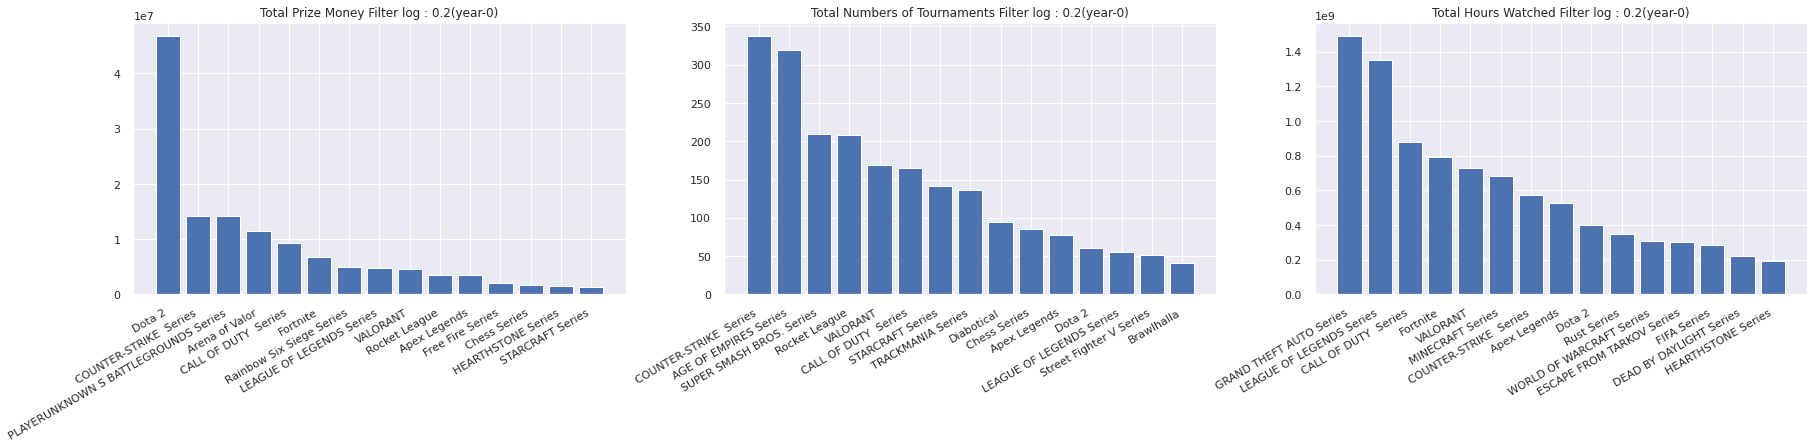

In [49]:
serieslisttop('log',0.2,0,100,15,'plot')

FILTER =  {2016: 3.925595860610245e-05, 2017: 0.00029006448035779047, 2018: 0.0021433027176708816, 2019: 0.015836984017860666, 2020: 0.1170203633458406, 2021: 0.864670029479664}
{'money': {'totalmoney2016+': 7040102.839999999, 'total': 7040102.839999999, 2020: 2380536.3099999996, 2021: 4659566.53, 'filter2016+': 4307558.752811722}, 'ntour': {'totalntour2016+': 480, 'total': 480, 2020: 311, 2021: 169, 'filter2016+': 182.52256798261965}, 'hw': {'totalhw2016+': 1544168268, 'total': 1544168268, 2020: 814503048, 2021: 729665220, 'filter2016+': 726233089.9109402}}


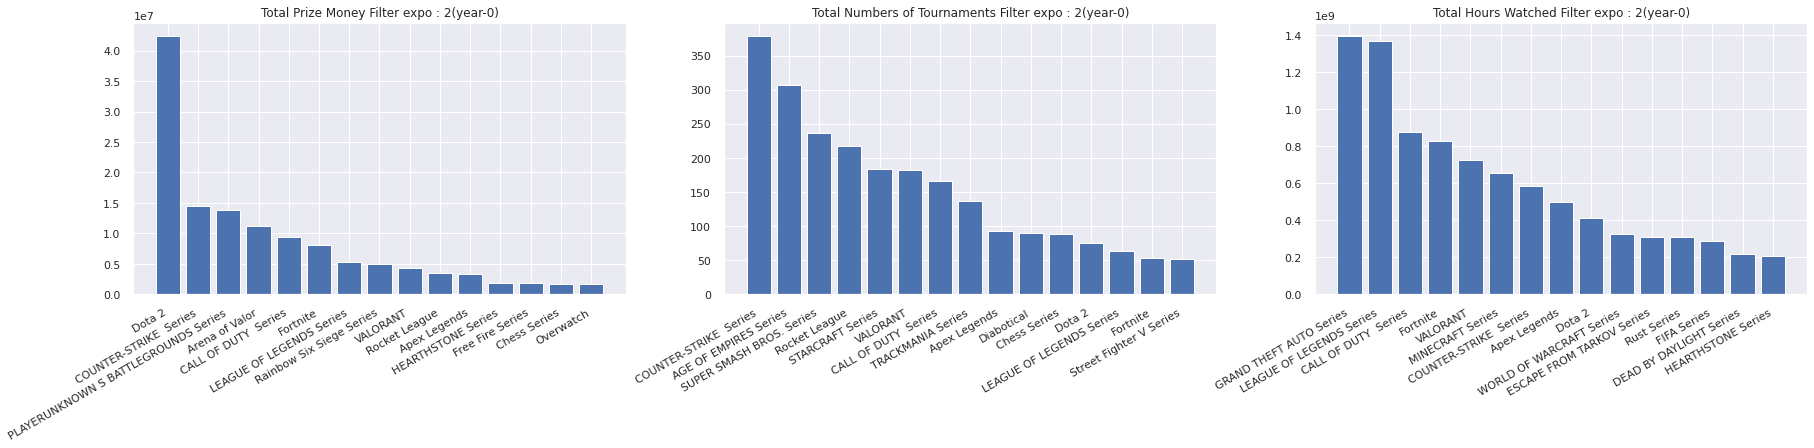

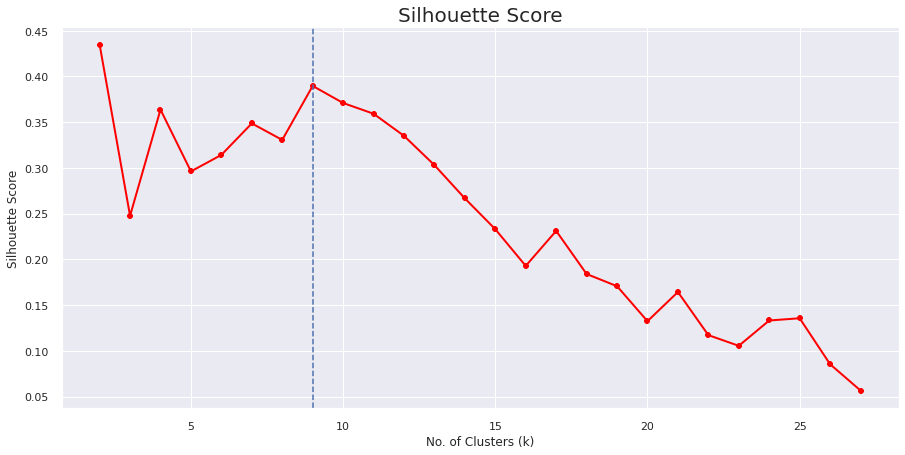

Cluster :  0
Rainbow Six Siege Series
HEARTHSTONE Series
DEAD BY DAYLIGHT Series
ESCAPE FROM TARKOV Series
Rust Series
Overwatch
FIFA Series
WORLD OF WARCRAFT Series

Cluster :  1
CALL OF DUTY  Series
VALORANT

Cluster :  2
STARCRAFT Series
AGE OF EMPIRES Series
SUPER SMASH BROS. Series
Rocket League

Cluster :  3
Dota 2

Cluster :  4
COUNTER-STRIKE  Series

Cluster :  5
PLAYERUNKNOWN S BATTLEGROUNDS Series
Arena of Valor

Cluster :  6
GRAND THEFT AUTO Series
LEAGUE OF LEGENDS Series

Cluster :  7
Fortnite
Apex Legends
MINECRAFT Series

Cluster :  8
Chess Series
Free Fire Series
TRACKMANIA Series
Diabotical
Street Fighter V Series



In [50]:

arr3 = {'Series Name':[],'Total Money':[],'Total Tournaments':[],'Hours Watched':[]}
for series in serieslisttop('expo',2,0,1,15,'plot'):
    arr3['Series Name'].append(series)
    arr3['Total Money'].append(gameclustered[series]['money']['filter2016+'])
    arr3['Total Tournaments'].append(gameclustered[series]['ntour']['filter2016+'])
    arr3['Hours Watched'].append(gameclustered[series]['hw']['filter2016+'])
clustering_seriesd = pd.DataFrame(arr3).drop('Series Name', axis=1)
clustering_series = (clustering_seriesd-clustering_seriesd.mean())/clustering_seriesd.std()
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
A=np.arange(2,len(arr3['Series Name']))
scores = pd.DataFrame(columns=['Score'])
seed = 134
for x in A:
    

    #  Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=x, random_state=seed,reg_covar=1e-4).fit(clustering_series)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(clustering_series)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(clustering_series,preds)
    scores.loc[x] = [score]
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(A,scores, linewidth=2, color="red", marker ="8")
n_clusters =  9
plt.axvline(x=n_clusters, ls='--')
plt.ylabel('Silhouette Score')
plt.xlabel('No. of Clusters (k)')
plt.title('Silhouette Score', fontsize = 20)
plt.show()

gmms = GaussianMixture(n_components=n_clusters, random_state=seed,reg_covar=1e-4)
#gmms.fit(clustering_series)
d = pd.DataFrame(arr3).drop('Series Name', axis=1)
d['Cluster_Prediction'] = gmms.fit_predict(clustering_series)
cmap = {0:'red',1:'blue',2:'green',3:'orange',4:'violet',5:'navajowhite',6:'pink',7:'#1f77b4',  # muted blue
    8:'#ff7f0e',  # safety orange
    9:'#2ca02c',  # cooked asparagus green
    10:'#d62728',  # brick red
    11:'#9467bd',  # muted purple
    12:'#8c564b',  # chestnut brown
    13:'#e377c2',  # raspberry yogurt pink
    14:'#7f7f7f',  # middle gray
    15:'#bcbd22',  # curry yellow-green
    16:'#17becf'   # blue-teal}
}
d['Color'] = [cmap[int(d.iloc[i]['Cluster_Prediction'])] for i in range(len(d))]
d['Series Name'] = [arr3['Series Name'][i] for i in range(len(d))]
import plotly.express as px

fig = px.scatter_3d(d, x='Total Money', y='Total Tournaments', z='Hours Watched',text='Series Name',
              color='Color')
fig.show()
for i in range(n_clusters):
  print("Cluster : ",i)
  for j in range(len(d)):
    if d.iloc[j]['Cluster_Prediction'] == i:
      print(d.iloc[j]['Series Name'])
  print()